In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
main_path_trainval = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set'
main_path_test = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Test_set'
img_size = (64, 64)
batch_size = 64

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

In [ ]:
train_folder = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set'
test_folder = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Test_set'

def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))
    
    for folder in folders:
        index += 1
      
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test


In [ ]:
def load_images_t():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(test_folder))
    
    for folder in folders:
        index += 1
      
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(test_folder + '/' + folder):
            img = cv2.imread(test_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    x_t = images
    labels = to_categorical(labels)
    y_t = labels

    #x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_t, y_t

In [ ]:
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [ ]:
x_train, x_test, y_train, y_test = load_images()

FileNotFoundError: ignored

In [ ]:
x_t, y_t = load_images_t()

Loading images from folder  V  has started.
Loading images from folder  W  has started.
Loading images from folder  X  has started.
Loading images from folder  Y  has started.
Loading images from folder  Z  has started.


In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=13)
x_test, y_test = shuffle(x_test, y_test, random_state=13)

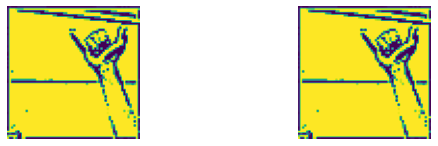

In [ ]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
t = np.zeros((64,64));
for i in un:
    plt.subplot(7,4,j)
    t = x_train[np.where(y_train == np.array(i))[0][0]]
    plt.imshow(t[:,:,0])
    plt.axis('off')
    j=j+1

In [ ]:
map_characters = { 1: 'V', 2: 'W', 3: 'X', 4: 'Y', 5: 'Z'}


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

In [ ]:
classes = 5
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
71/71 [==============================] - 18s 231ms/step - loss: 1.3746 - accuracy: 0.3947 - val_loss: 0.8275 - val_accuracy: 0.6760
Epoch 2/10
71/71 [==============================] - 16s 230ms/step - loss: 0.4378 - accuracy: 0.8409 - val_loss: 0.1688 - val_accuracy: 0.9480
Epoch 3/10
71/71 [==============================] - 16s 231ms/step - loss: 0.0885 - accuracy: 0.9702 - val_loss: 0.0247 - val_accuracy: 0.9960
Epoch 4/10
71/71 [==============================] - 16s 227ms/step - loss: 0.0142 - accuracy: 0.9982 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 5/10
71/71 [==============================] - 16s 221ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
71/71 [==============================] - 16s 223ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.6587e-04 - val_accuracy: 1.0000
Epoch 7/10
71/71 [==============================] - 16s 223ms/step - loss: 6.3166e-04 - accuracy: 1.0000 - val_loss: 4.8769e-04 - val_accu

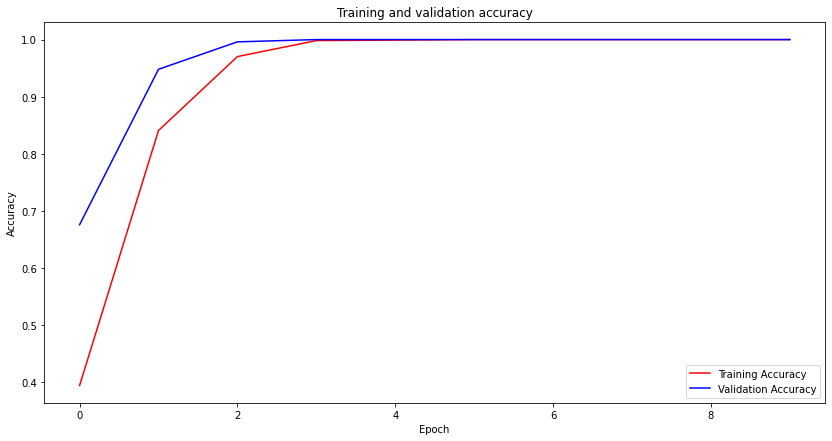

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

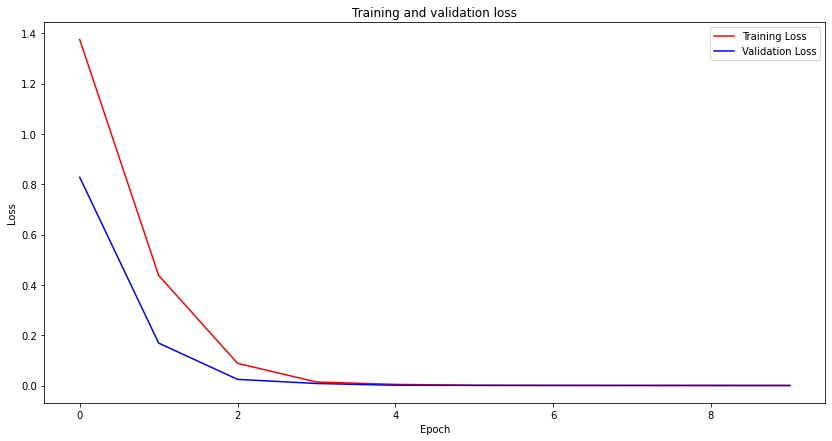

In [ ]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
class_labels = list(map_characters.values())

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)


Keras CNN - accuracy: 1.0 

8/8 [==============================] - 0s 51ms/step
              precision    recall  f1-score   support

           V       1.00      1.00      1.00        49
           W       1.00      1.00      1.00        50
           X       1.00      1.00      1.00        38
           Y       1.00      1.00      1.00        55
           Z       1.00      1.00      1.00        58

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



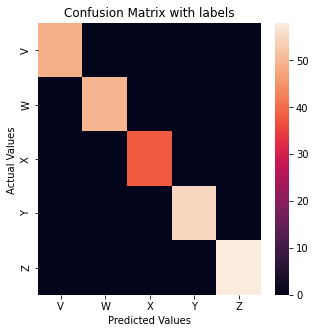

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
#print('Confusion Matrix\n')
#print(confusion)

In [ ]:
from keras.models import model_from_json
json_model = model.to_json()

with open('CNNThreshold.json', 'w') as json_file:
    json_file.write(json_model)

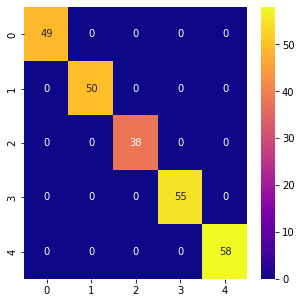

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, cmap="plasma", annot=True)

In [ ]:
score = model.evaluate(x_t,y_t, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)


Keras CNN - accuracy: 0.7919999957084656 

8/8 [==============================] - 0s 49ms/step
              precision    recall  f1-score   support

           V       1.00      1.00      1.00        49
           W       1.00      1.00      1.00        50
           X       1.00      1.00      1.00        38
           Y       1.00      1.00      1.00        55
           Z       1.00      1.00      1.00        58

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



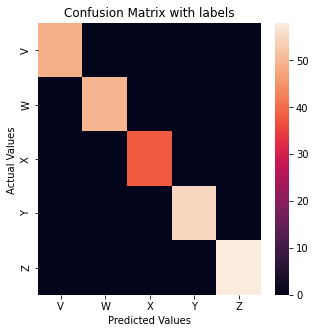

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

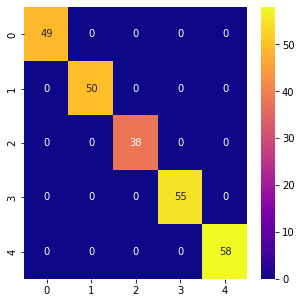

In [ ]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
from keras.models import model_from_json
json_model = model.to_json()

with open('CNNThreshold.json', 'w') as json_file:
    json_file.write(json_model)
    plt.figure(figsize=(5, 5))

sns.heatmap(confusion, cmap="plasma", annot=True)